In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
orders_df = pd.read_csv(r"C:\Users\Bharath\Downloads\orders.csv")



In [3]:
orders_df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [4]:
users_df = pd.read_json(r"C:\Users\Bharath\Downloads\users.json")

In [5]:
users_df.head()

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [6]:
conn = sqlite3.connect("restaurants.db")
cursor = conn.cursor()

In [8]:
with open(r"C:\Users\Bharath\Downloads\restaurants.sql", "r") as file:
    sql_script = file.read()

cursor.executescript(sql_script)
conn.commit()

In [9]:
restaurants_df = pd.read_sql("SELECT * FROM restaurants", conn)

restaurants_df.head()

,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [10]:
orders_users_df = pd.merge(
    orders_df,
    users_df,
    on="user_id",
    how="left"
)

orders_users_df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,name,city,membership
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular


In [11]:
final_df = pd.merge(
    orders_users_df,
    restaurants_df,
    on="restaurant_id",
    how="left"
)

final_df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [12]:
final_df.to_csv("final_food_delivery_dataset.csv", index=False)

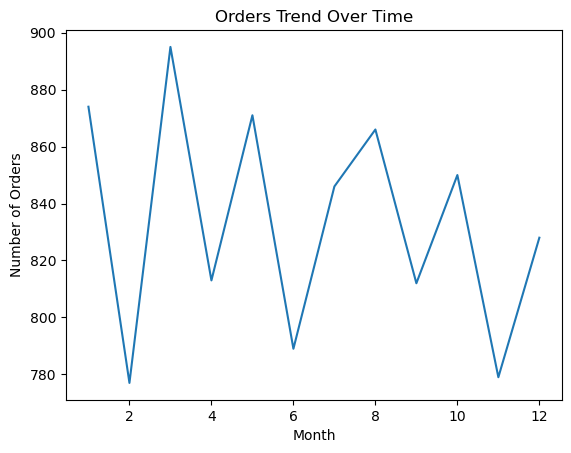

In [14]:
#Order Trends Over Time

final_df['order_date'] = pd.to_datetime(final_df['order_date'])

orders_over_time = final_df.groupby(final_df['order_date'].dt.month)['order_id'].count()

orders_over_time.plot(kind='line')
plt.title("Orders Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()

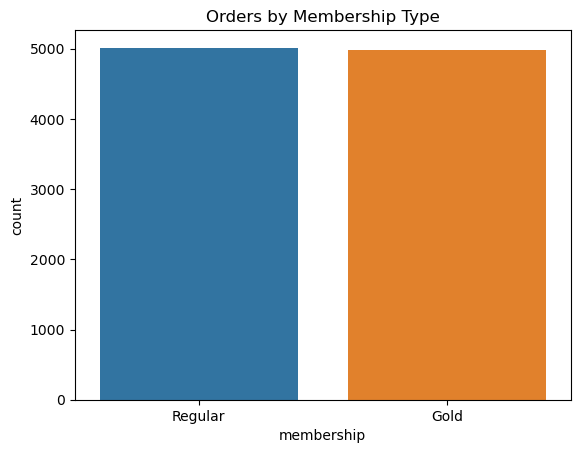

In [15]:
#User Behavior 
sns.countplot(data=final_df, x='membership')
plt.title("Orders by Membership Type")
plt.show()

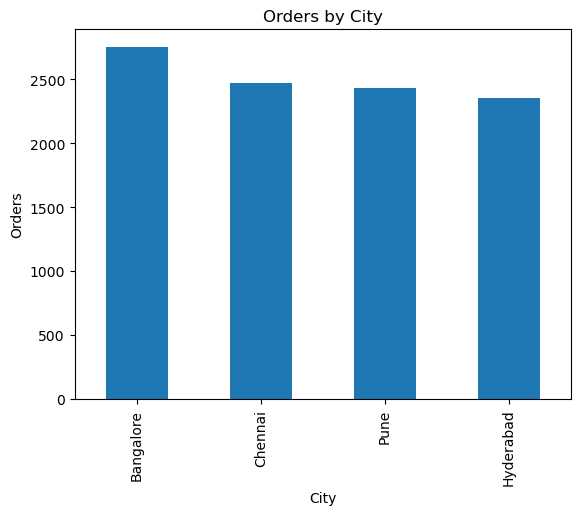

In [16]:
#City-wise Performance
city_orders = final_df['city'].value_counts()

city_orders.plot(kind='bar')
plt.title("Orders by City")
plt.xlabel("City")
plt.ylabel("Orders")
plt.show()

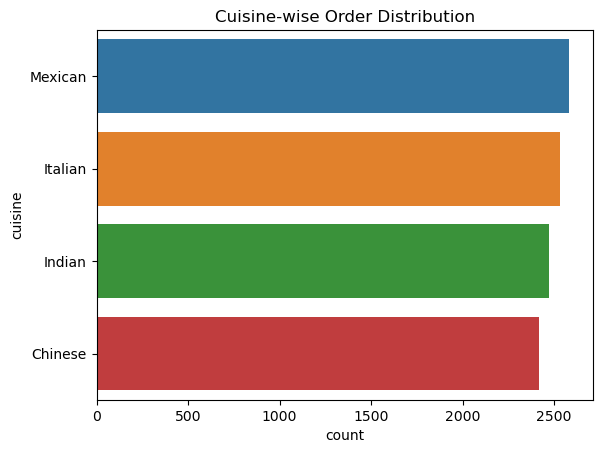

In [52]:
#Cuisine-wise Performance
sns.countplot(
    data=final_df,
    y='cuisine',
    order=final_df['cuisine'].value_counts().index
)
plt.title("Cuisine-wise Order Distribution")
plt.show()

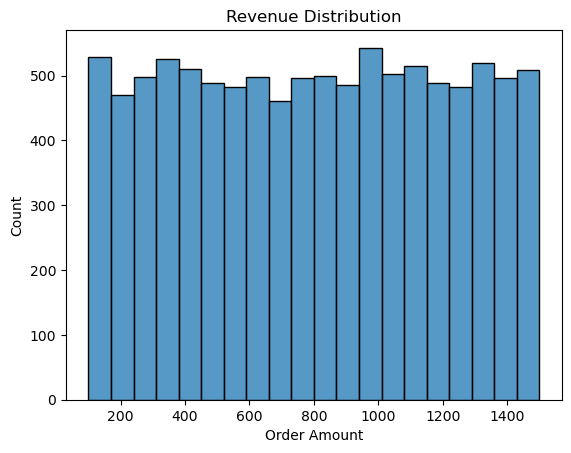

In [53]:
#Revenue Distribution
sns.histplot(final_df['total_amount'], bins=20)
plt.title("Revenue Distribution")
plt.xlabel("Order Amount")
plt.show()

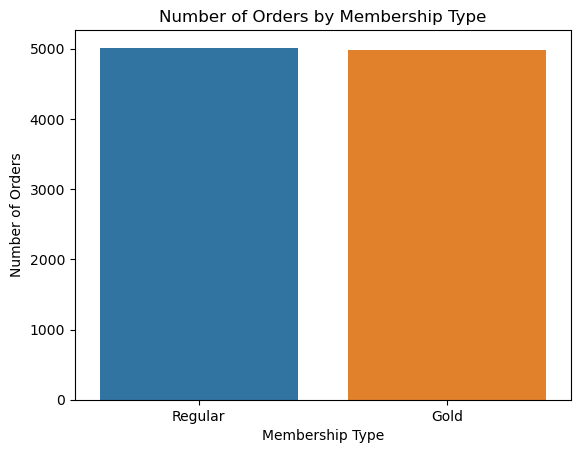

In [54]:
#Membership impact (Gold vs Regular)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=final_df, x='membership')
plt.title("Number of Orders by Membership Type")
plt.xlabel("Membership Type")
plt.ylabel("Number of Orders")
plt.show()
